In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [46]:
# Load data
train_data = pd.read_csv(r"C:\Users\HP\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\HP\Downloads\test.csv")

In [47]:
print("Train Data Overview:\n")
train_data.head()

Train Data Overview:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
print("Test Data Overview:\n")
test_data.head()

Test Data Overview:



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
# Exploratory Data Analysis
print("Train Data Info:\n")
train_data.info()

Train Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


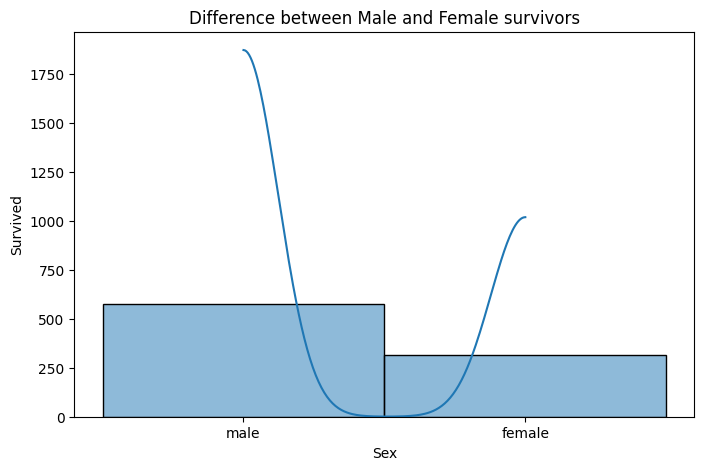

In [50]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Sex'], kde=True, bins=30)
plt.title('Difference between Male and Female survivors')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

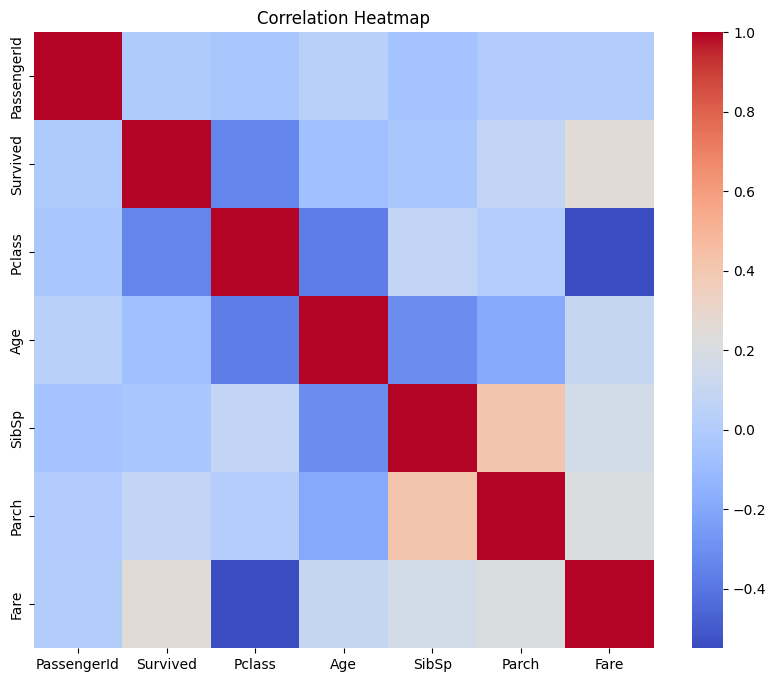

In [51]:
# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.select_dtypes(include = 'number').corr(), annot = False, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder
le_embarked = LabelEncoder()
train_data['Embarked'] = le_embarked.fit_transform(train_data['Embarked'])
le_ticket = LabelEncoder()
train_data['Ticket'] = le_ticket.fit_transform(train_data['Ticket'])
le_cabin = LabelEncoder()
train_data['Cabin'] = le_cabin.fit_transform(train_data['Cabin'])

In [53]:
train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

In [54]:
# Feature selection and preprocessing
# features = ['PassengerId', 'Survived', 'Pclass']
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [55]:
X = train_data[features]
y = train_data[target]

In [56]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [57]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [59]:
# Model training: Random Forest Regressor
rfc = RandomForestClassifier(random_state=42, n_estimators=100, class_weight = 'balanced')
rfc_model = rfc.fit(X_train, y_train)
rfc_model

RandomForestClassifier(class_weight='balanced', random_state=42)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_val, rfc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [61]:
import joblib

joblib.dump(rfc_model, "titanic_survival_model.pkl")

print("Model successfully.")

Model successfully.


In [62]:
# Model training: Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state = 1)
dtc_model = dtc.fit(X_train, y_train)
dtc_model

DecisionTreeClassifier(random_state=1)

In [63]:
print(classification_report(y_val, dtc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [64]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 

In [66]:
lr = LogisticRegression(max_iter = 5000, random_state = 1)
nb = GaussianNB()

In [67]:
vc = VotingClassifier(estimators = [('tree', dtc), ('linear', lr), ('naive', nb)])

In [68]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=1)),
                             ('linear',
                              LogisticRegression(max_iter=5000,
                                                 random_state=1)),
                             ('naive', GaussianNB())])

In [69]:
print(classification_report(y_val, vc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.61      0.70        74

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.78       179



In [70]:
ada = AdaBoostClassifier(n_estimators = 20, random_state = None)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20)

In [71]:
print(classification_report(y_val, ada.predict(X_val)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [72]:
etc = ExtraTreeClassifier()
etc.fit(X_train, y_train)

ExtraTreeClassifier()

In [73]:
print(classification_report(y_val, etc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [74]:
gbc = GradientBoostingClassifier(n_estimators = 20)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20)

In [75]:
print(classification_report(y_val, gbc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.62      0.71        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [76]:
bc = BaggingClassifier(n_estimators = 20)
bc.fit(X_train, y_train)

BaggingClassifier(n_estimators=20)

In [77]:
print(classification_report(y_val, bc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
print(classification_report(y_val, knc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [81]:
lrc = LogisticRegression(max_iter=1000)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
print(classification_report(y_val, lrc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.73      0.69      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179



In [83]:
from xgboost import XGBClassifier

In [84]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
print(classification_report(y_val, xgbc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [87]:
print(classification_report(y_val, svc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179

